# R Code Examples for MATH422: Mathematical Statistics

This notebook contains example code for various actions performed in MATH422.

## Probability Distributions

For probability distributions, the pmf/pdf is receded by the `d` character and the cdf is preceded by the `p` character.

### Binomial Distribution

In [1]:
dbinom(3, size=5, prob=0.2)

[1] 0.0512

In [2]:
pbinom(3, size=5, prob=0.2)

[1] 0.99328

### Poisson Distribution

In [3]:
dpois(3, lambda=6)

[1] 0.08923508

In [4]:
ppois(3, lambda=6)

[1] 0.1512039

### Hypergeometric Distribution

In [5]:
dhyper(2, 4, 5, 7)

[1] 0.1666667

In [6]:
phyper(2, 4, 5, 7)

[1] 0.1666667

### Uniform Distribution

In [7]:
dunif(3, min=1, max=6)

[1] 0.2

In [8]:
punif(3, min=1, max=6)

[1] 0.4

### Exponential Distribution

In [9]:
dexp(2, rate=5)

[1] 0.0002269996

In [10]:
pexp(2, rate=5)

[1] 0.9999546

### Normal Distribution

In [11]:
dnorm(45, mean=60, sd=10)

[1] 0.01295176

In [12]:
pnorm(45, mean=60, sd=10)

[1] 0.0668072

### Standard Normal Distribution

In [13]:
dnorm(2)

[1] 0.05399097

In [14]:
pnorm(2)

[1] 0.9772499

## Generating Random Numbers

> Generate a random sample of size 100 from a normal distribution with mean 10 and standard deviation 3. Then do the following:
>
> 1. Find the value of the (sample) mean, variance, standard deviation, minimum, maximum, range, and median
> 2. Plot the histogram and the density curve
> 3. Obtain an unbiased and sufficient estimate of $\mu$

In [15]:
# Generate the random number sample
rn = rnorm(n=100, mean=10, sd=3)

In [16]:
mean(rn)

[1] 9.917908

In [17]:
var(rn)

[1] 9.560393

In [18]:
sd(rn)

[1] 3.091989

In [19]:
min(rn)

[1] 2.386995

In [20]:
max(rn)

[1] 16.51805

In [21]:
quantile(rn, 0.5)

50% 
10.18538

In [22]:
print(summary(rn))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.387   7.961  10.185   9.918  11.756  16.518 


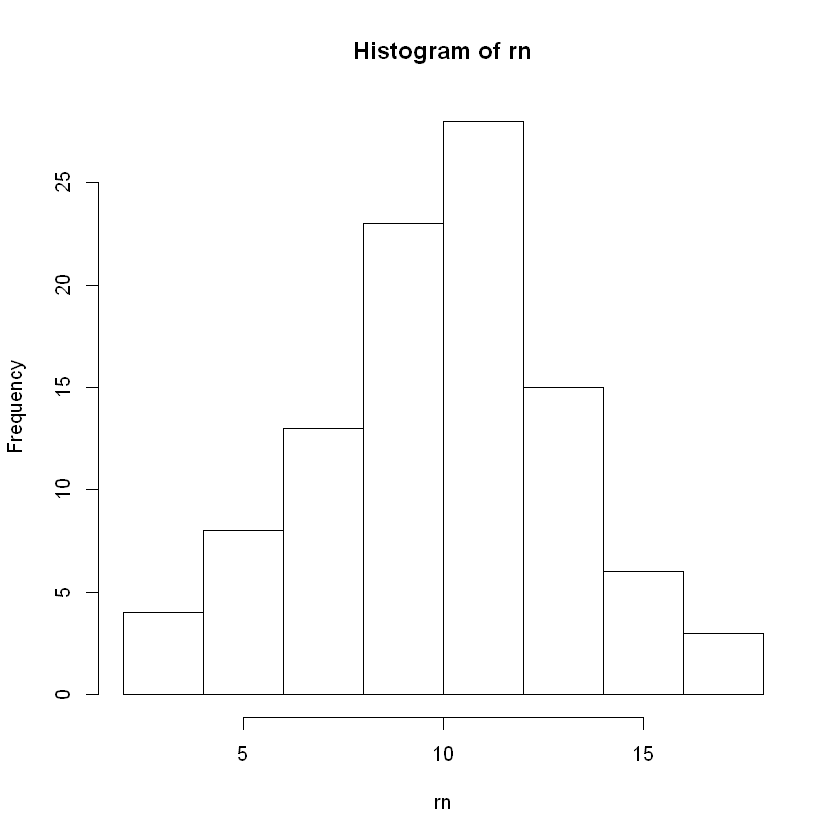

In [23]:
hist(rn)

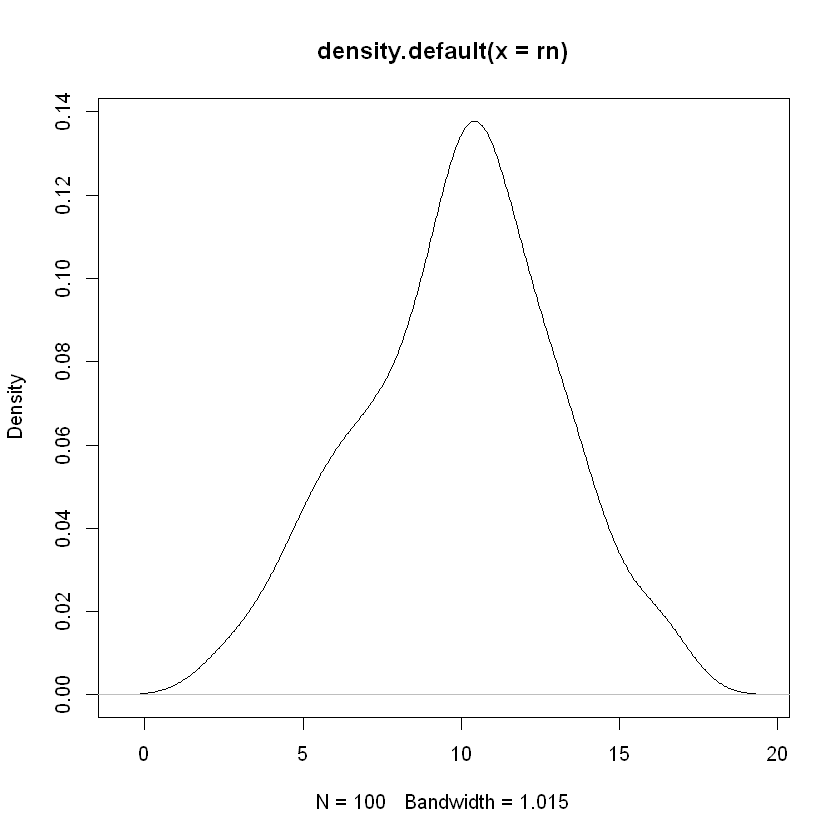

In [24]:
plot(density(rn))

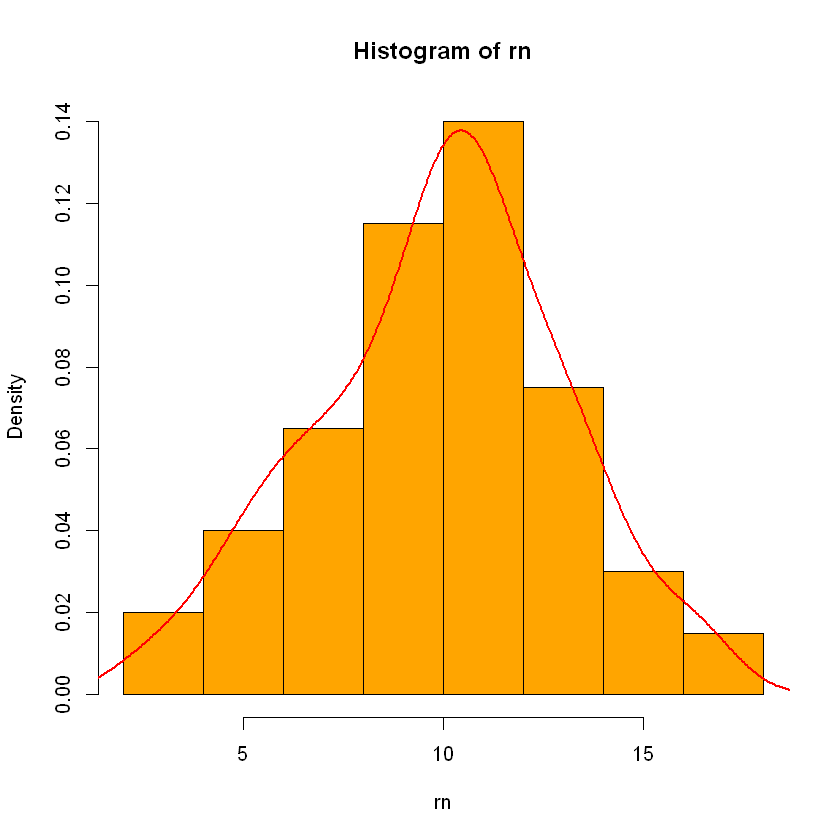

In [25]:
# Plotting the histogram and the density curve together
hist(rn, col='orange', prob=T)
lines(density(rn), lwd=2, col='red')

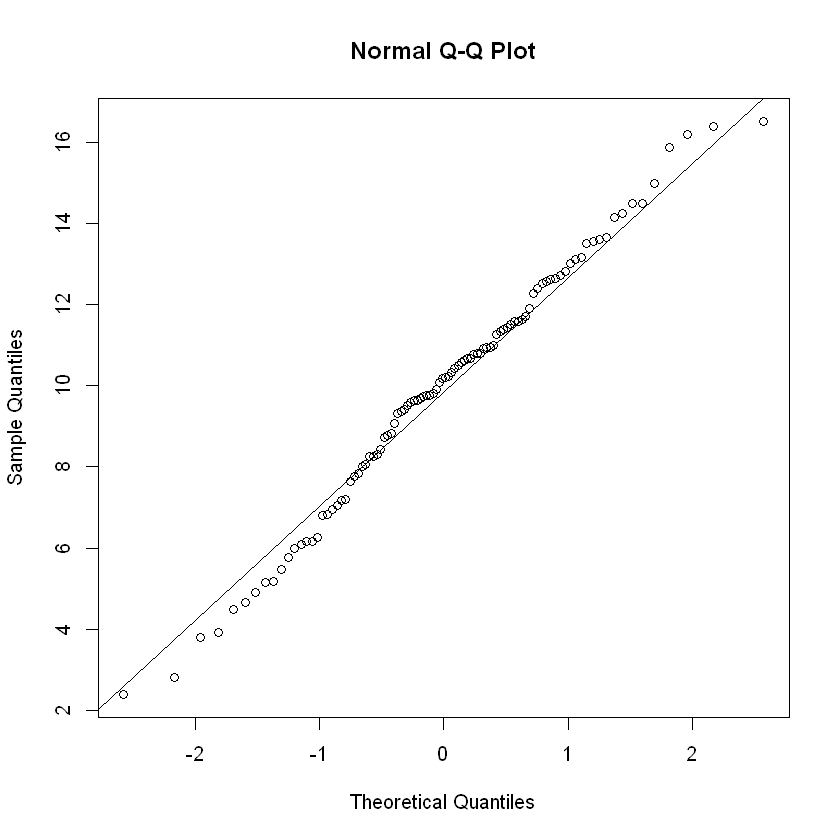

In [26]:
# Check Normality
qqnorm(rn)
qqline(rn)

In [27]:
#unbiased and sufficient estimator of mu
mean(rn)

[1] 9.917908

In [28]:
#standard error
sd(rn)/sqrt(length(rn))

[1] 0.3091989

## Central Limit Theorem

> Generate 100 random samples of size 5, 10, 20, and 30 from a normal distribution with mean 10 and standard deviation 3 and calculate sample mean for each sample. Draw the histrogram and density curve of sample means.

In [29]:
# choose sample size/number of sample
n = 5
n.samples = 10000

# Sampling from a standard normal distribution
data = matrix(rnorm(n * n.samples,0,1), nrow=n.samples, ncol=n) # generating data
xbars = apply(data, 1, mean) # sample mean

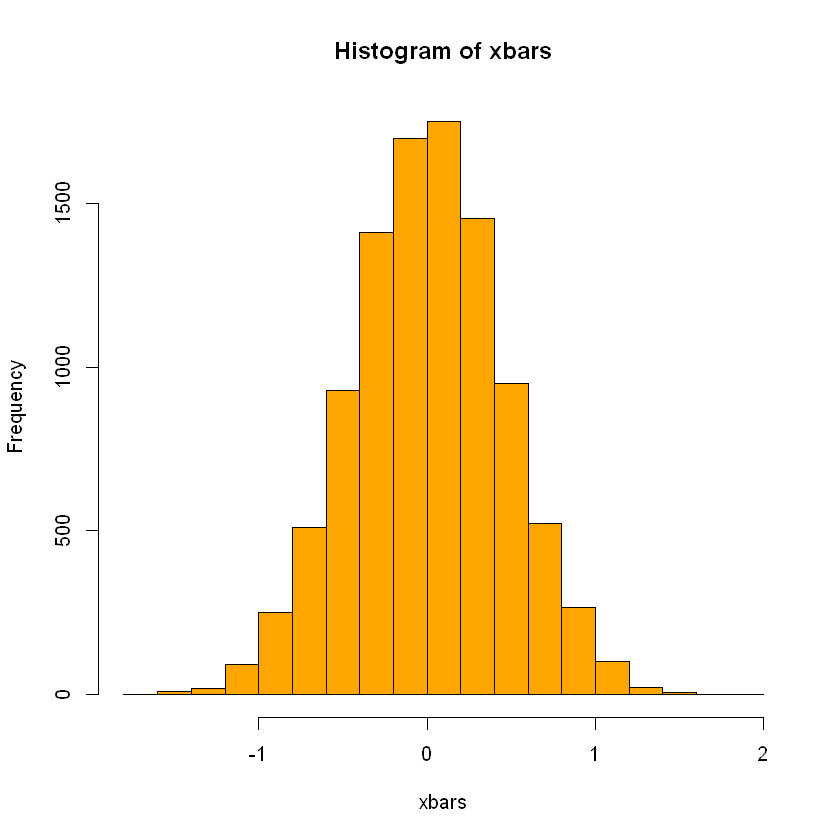

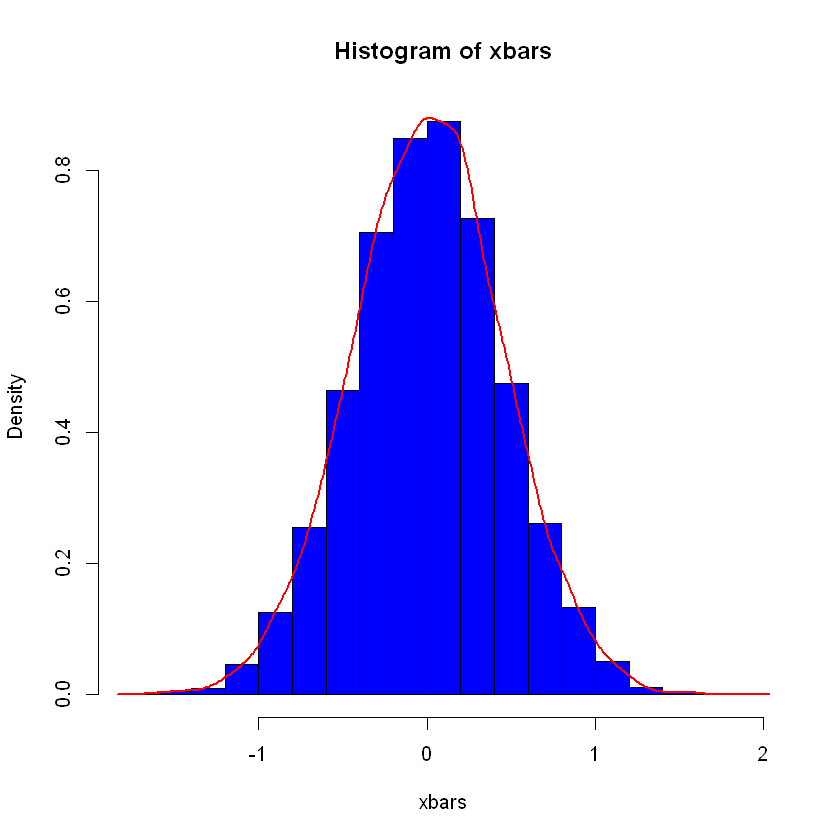

In [30]:
hist(xbars, col='orange') # histogram without probability
hist(xbars, col='blue', prob=T) # histogram
lines(density(xbars), lwd = 2, col='red') #density curve

## MME

Generate 100 samples of size 10 from a normal distribution with $\mu = 14$ and $\sigma = 4$. Estimate $\mu$ and $\sigma^2$ from your samples using the method of moments. Plot the estimated values of $\mu$ and $\sigma^2$. Comment on results.

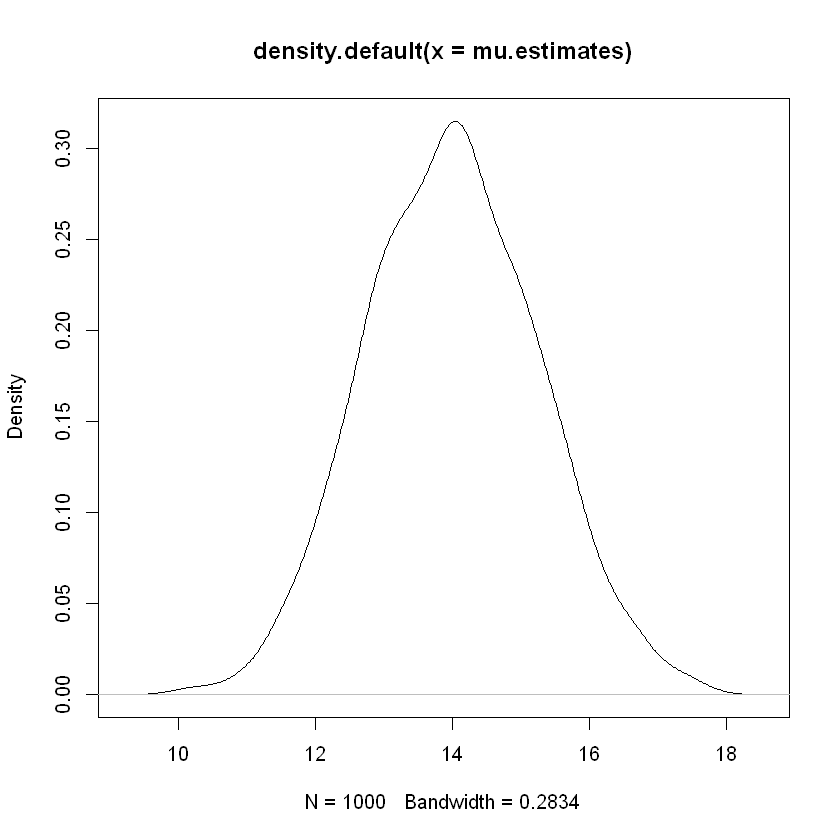

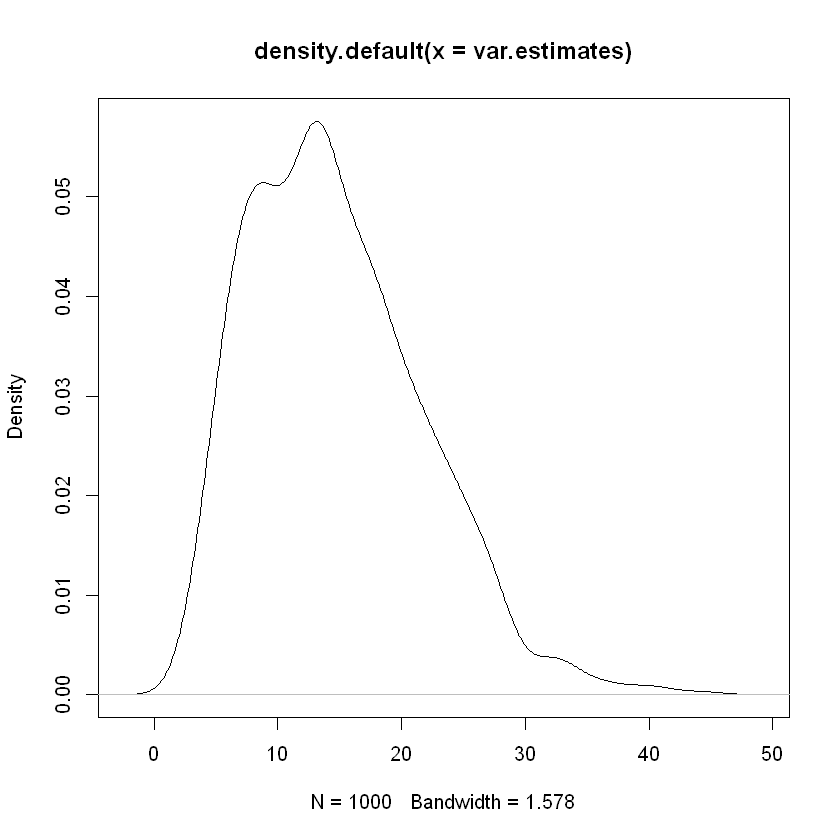

In [31]:
mu = 14
sigma = 4
sampsz = 10
nsimulations = 1000
mu.estimates = numeric(nsimulations)
var.estimates = numeric(nsimulations)

for (i in 1:nsimulations)
{
    rn = rnorm(mean=mu, sd=sigma, n=sampsz)
    mu.estimates[i] = mean(rn)
    var.estimates[i] = mean((rn - mean(rn))^2)
}

plot(density(mu.estimates))
plot(density(var.estimates))

Generate 100 random samples of size 10 from a $U(0,10)$ distribution. For each of the 100 samples generated calculate the MME and MLE for $\mu$ and graph the results.

(a) from the graphs does it appear that the estimators are biased or unbiased? Explain.

(b) Estimate the variance of the two esimators by finding the sample variance of the 100 estimates (for each esimator). Which estimator appears more efficient?

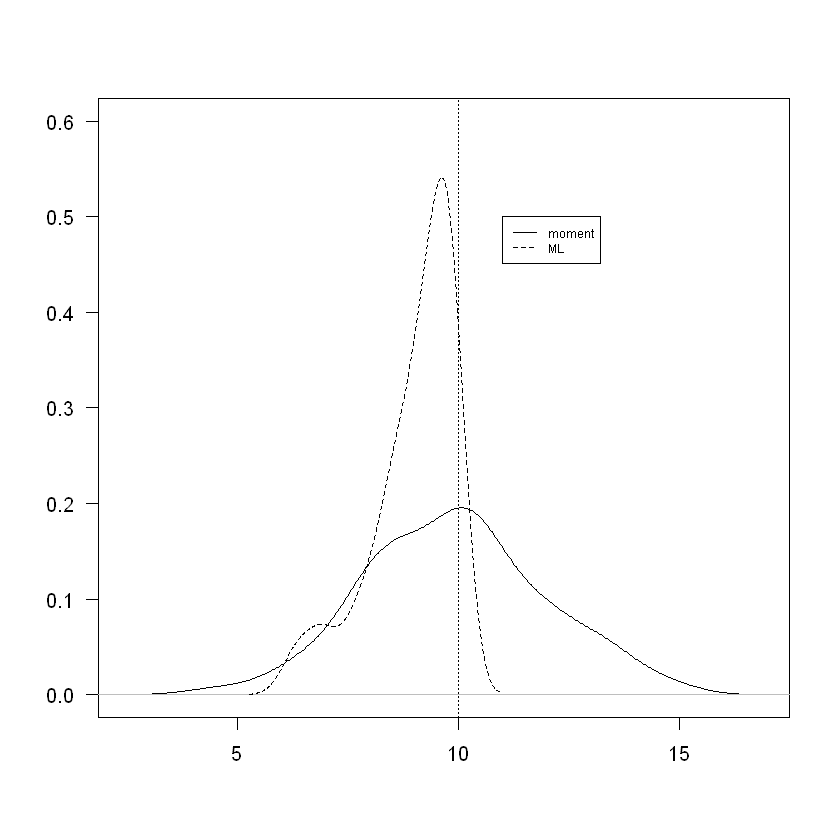

In [32]:
theta = 10
sampsz = 10
nsimulations = 100
moment.estimates = numeric(nsimulations)
ML.estimates = numeric(nsimulations)

for (i in 1:nsimulations)
{
    ru = runif(n=sampsz,min=0,max=theta)
    moment.estimates[i] = 2*mean(ru)
    ML.estimates[i] = max(ru)
}

plot(density(moment.estimates), xlab=" ",ylab=" ",main=" ",ylim=c(0,0.6),las=1)
abline(v=theta,lty=3)
lines(density(ML.estimates),lty=2)
legend(11,0.5,legend=c("moment","ML"),lty=1:2,cex=0.6)

Generate 100 samples of size 10 from a uniform distribution $U(0, \theta)$ with $\theta = 10$. Estimate the value of $\theta$ from your samples using the method of moments and plot the results. Commend on the results.

**SOLUTION:** Given $X_1, X_2, ..., X_n$ is a random sample from a $U(0, \theta)$ distribution, the moments estimator (MME) of $\theta$ is $\tilde \theta = 2 \overline X$.

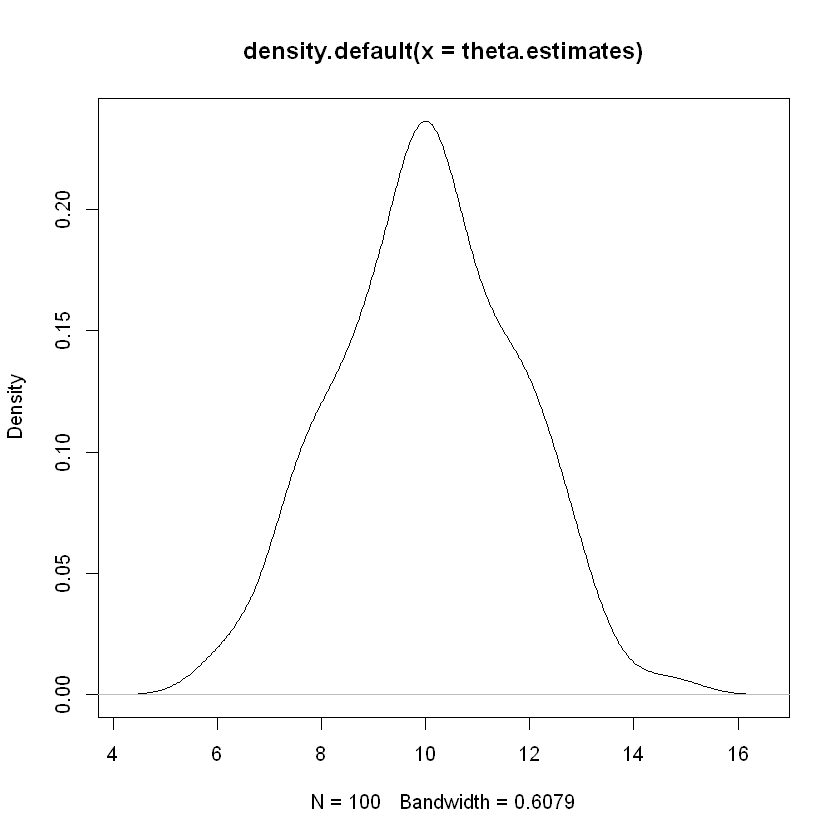

In [33]:
theta = 10
sampsz = 10
nsimulations = 100
theta.estimates = numeric(nsimulations)

for (i in 1:nsimulations)
{
    ru = runif(n=sampsz,min=0,max=theta)
    Xbar = mean(ru)
    theta.estimates[i] = 2*Xbar
} # end of the i loop

plot(density(theta.estimates))

## Power Curves

> Ex (a): The current machine makes rods with mean $\mu = 100$ cm and standard deviation $\sigma = 2$. The manager is considering buying a new machine and is interested in the purchase only of the variance of rod lengths is smaller. He will get a sample of 𝑛 = 12 rods made by the new machine and test $𝐻_0$: $\sigma = 2$ versus $𝐻_𝑎$: $\sigma < 2$. He wants to use $\alpha = 0.01$ because of the cost of the new machine.

Test statistic:

$$
T = \frac{\sum_{i=1}^{12}(X_i-100)^2}{4} \sim \chi_{12}^2
$$

The power of this test:

$$
P(T < 3.571) = P\left(\frac{\sum_{i=1}^{12}(X_i-100)^2}{\sigma^2} < \frac{4 \cdot 3.571}{\sigma^2}\right)
$$

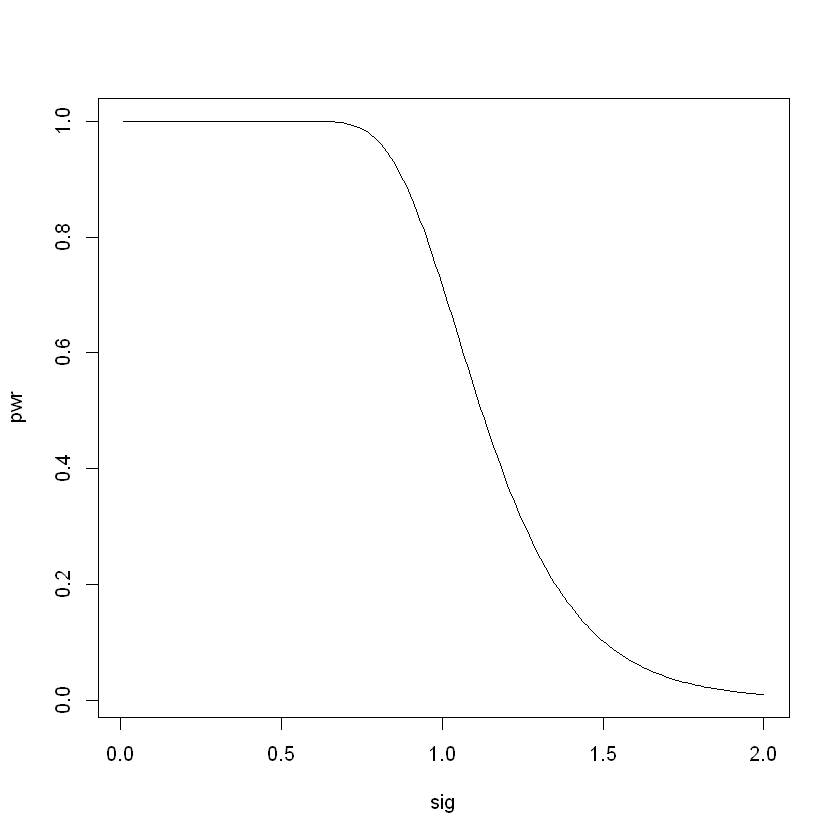

In [3]:
sig=1:200/100
n=12
crit=qchisq(0.01,n)
pwr=pchisq(4*crit/sig^2,n)
plot(sig, pwr, type="l")

If the manager wants to be able to detect a true standard deviation of $\sigma = 1.5$, while maintaining the same significance level $\alpha$, the sample size must be increased. Let’s fix $\sigma = 1.5$ and make a power curve for the manager, with increasing sample size:

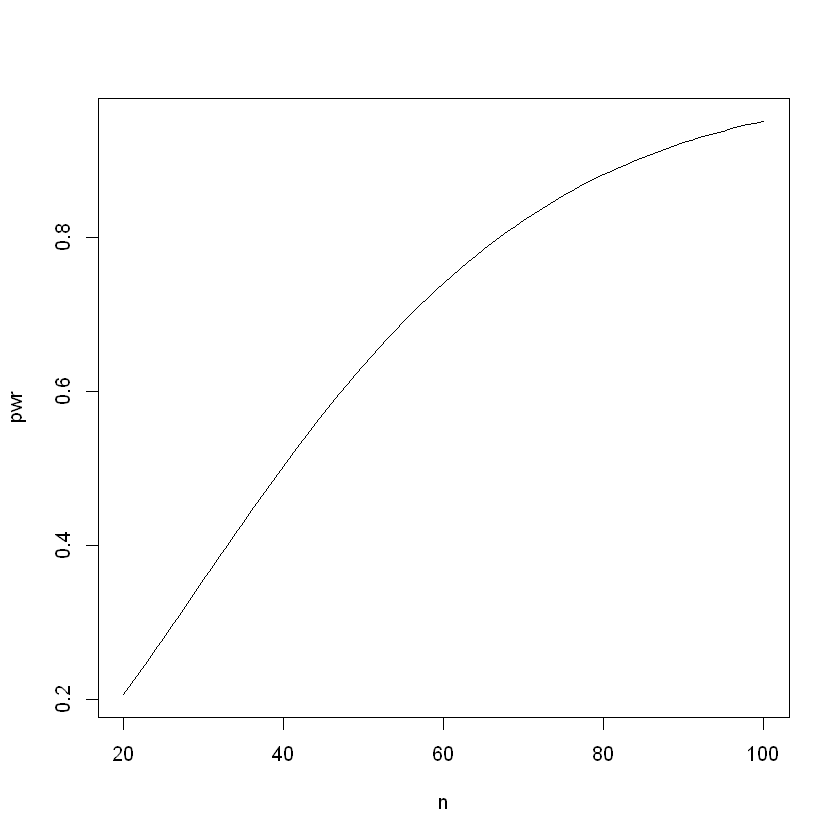

In [4]:
sig=1.5
n=20:100
crit=qchisq(0.01,n)
pwr=pchisq(4*crit/sig^2,n)
plot(n, pwr, type='l')